# The error function
### phys581_week01a-notes

http://mathworld.wolfram.com/Erf.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import scipy
import scipy.special as special
import scipy.stats as stats
import scipy.integrate as integrate

## Elementary functions
https://en.wikipedia.org/wiki/Elementary_function

In mathematics, an elementary function is a function of one variable which is the composition of a finite number of arithmetic operations (+ – × ÷), exponentials, logarithms, constants, and solutions of algebraic equations (a generalization of nth roots).

The elementary functions include:

  
 1. Powers of $x:x,x^{2},x^{3}$, etc.
 1. Roots of $x:{\sqrt {x}},{\sqrt[{3}]{x}},$, etc.
 1. Exponential functions: $e^{x}$
 1. Logarithms: $\log x$
 1. Trigonometric functions: $\sin x, \cos x$ etc.
 1. Inverse trigonometric functions: $\arcsin x,\arccos x$ etc.
 1. Hyperbolic functions:$\sinh x,\cosh x$ etc.
 1. All functions obtained by replacing $x$ with any of the previous functions
 1. All functions obtained by adding, subtracting, multiplying or dividing any of the previous functions

## Special functions
https://en.wikipedia.org/wiki/Special_functions

Special functions are particular mathematical functions which have more or less established names and notations due to their importance in mathematical analysis, functional analysis, physics, or other applications.

Many special functions appear as solutions of differential equations or integrals of elementary functions. Therefore, tables of integrals usually include descriptions of special functions, and the integral representation of special functions. Because symmetries of differential equations are essential to both physics and mathematics, the theory of special functions is closely related to the theory of Lie groups and Lie algebras, as well as certain topics in mathematical physics.


### Evaluation of special functions
Most special functions are considered as a function of a complex variable. They are analytic; the singularities and cuts are described; the differential and integral representations are known and the expansion to the Taylor series or asymptotic series are available. In addition, sometimes there exist relations with other special functions; a complicated special function can be expressed in terms of simpler functions. Various representations can be used for the evaluation; the simplest way to evaluate a function is to expand it into a Taylor series. However, such representation may converge slowly if at all. In algorithmic languages, rational approximations are typically used, although they may behave badly in the case of complex argument(s).

## Abramowitz & Stegun
http://people.math.sfu.ca/~cbm/aands/index.htm

https://en.wikipedia.org/wiki/Abramowitz_and_Stegun

Abramowitz and Stegun (AS) is a mathematical reference work edited by Milton Abramowitz and Irene Stegun of the United States National Bureau of Standards (NBS), now the National Institute of Standards and Technology (NIST). Its full title is Handbook of Mathematical Functions with Formulas, Graphs, and Mathematical Tables. A digital successor to the Handbook was released as the "Digital Library of Mathematical Functions" (DLMF) on May 11, 2010, along with a printed version, the NIST Handbook of Mathematical Functions, published by Cambridge University Press

### Overview
Since it was first published in 1964, the 1046 page Handbook has been one of the most comprehensive sources of information on special functions, containing definitions, identities, approximations, plots, and tables of values of numerous functions used in virtually all fields of applied mathematics. The notation used in the Handbook is the de facto standard for much of applied mathematics today.

At the time of its publication, the Handbook was an essential resource for practitioners. Nowadays, computer algebra systems have replaced the function tables, but the Handbook remains an important reference source. The foreword discusses a meeting in 1954 in which it was agreed that "the advent of high-speed computing equipment changed the task of table making but definitely did not remove the need for tables".

### The NIST Handbook of Mathematical Functions
https://www.nist.gov/publications/nist-handbook-mathematical-functions

https://dlmf.nist.gov/


The new NIST handbook of mathematical functions is a superb resource.

But...

09 January 2019

   NOTICE: Due to a lapse in government funding, this and almost all NIST-affiliated websites will be unavailable until further   notice. Learn more

   NIST websites for programs using non-appropriated funds (NVLAP and PSCR) or those that are excepted from the shutdown (such as NVD) will continue to be available and updated.


   Sorry, but due to fact that the federal government is currently shut down, the website dlmf.nist.gov will be unavailable until further notice. Learn More
   Local time is: Wednesday, 09-Jan-2019 15:22:15 EST

   If you believe you received this page in error or have other questions, please send us an email with your issue to: mcsdweb@nist.gov. Please copy/paste the contents of this page. We will investigate and respond after operations resume.
   
<img src="http://hrb.mco.wpengine.com/files/2011/09/spinning-plates1.gif">   

## Error function
https://en.wikipedia.org/wiki/Error_function

The error function (also called the Gauss error function) is a special function (non-elementary) of sigmoid shape that occurs in probability, statistics, and partial differential equations describing diffusion. It is defined as:

  $$ \begin{aligned} \operatorname {erf} (x)
  &={\frac {1}{\sqrt {\pi }}}\int _{-x}^{x}e^{-t^{2}}\,dt\\[5pt]
  &={\frac {2}{\sqrt {\pi }}}\int _{0}^{x}e^{-t^{2}}\,dt.
  \end{aligned} $$ 


In statistics, for nonnegative values of x, the error function has the following interpretation: for a random variable Y that is normally distributed with mean 0 and variance 1/2, erf(x) describes the probability of Y falling in the range [−x, x]

There are several related functions which may be encountered in the physical sciences:

complementary error function
  $$erfc(z) = 1 - erf(z) $$
  
imaginary errror function
  $$erfi(z) = -i \, erf(iz) $$

Faddeeva function
  $$w(z) = e^{-z^2} erfc(-iz)$$
  
Dawson function  
  $$D(z) = \frac{\sqrt \pi}{2} e^{-z^2} erfi(z)$$ 
  
as well as Voight functions and Fresnel integrals.  

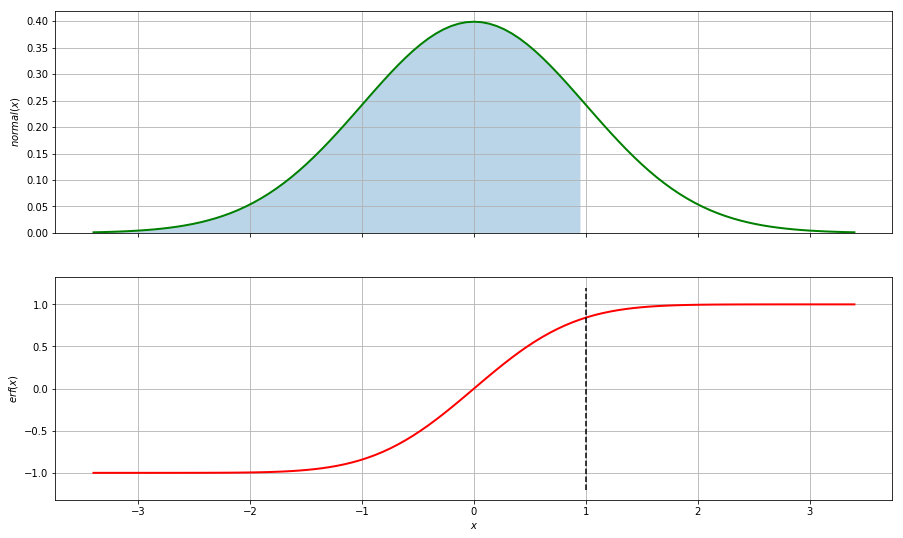

In [2]:
fig, axes = plt.subplots(2, 1, figsize=(15,9), sharex=True)

x = np.linspace(-3.4, 3.4, 101)

mean, stdev = 0, 1
y0 = stats.norm(loc=mean, scale=stdev).pdf(x)
plt.sca( axes[0] )
plt.plot(x, y0, 'g-', lw=2)
plt.grid(True)
plt.ylabel('$normal(x)$')
#plt.xlabel('$x$')
plt.fill_between(x[x<=1], 0, y0[x<=1], alpha=0.3)
plt.ylim(0,0.42)

y1 = special.erf(x)
plt.sca( axes[1] )
plt.plot(x, y1, 'r-', lw=2)
plt.grid(True)
plt.ylabel('$erf(x)$')
plt.xlabel('$x$')
plt.plot([1,1],[-1.2, +1.2 ], 'k--')


### Don't use the definition

The error function is usually defined in terms of an integral.  However, this is not necessarily the best way to actually calculate it.  Using relatively simple numerical quadrature will take roughly $15000\times$ longer than calling the scipy library function, and gives an answer that is only accurate to 1 part in 1000.  More sophisticated integration methods might be able to produce better results in less time, but specialized programs are always going to be superior.

*Handy heuristic: the textbook definition is rarely the best algorithm*

In [3]:
x = 1.0
y0 = special.erf(x)
%timeit y0 = special.erf(x)

func = stats.norm(loc=0, scale=1).pdf
y1 = integrate.quad( func, -np.inf, x )
%timeit y1 = integrate.quad( func, -np.inf, x )

print(y0, 'scipy.special.erf: ')
print(y1[0], 'scipy.stats.norm <= scipy.integrate.quad ')
print(y0-y1[0], 'integration error' )
print( y1[1], 'predicted integration error')

976 ns ± 135 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
14.2 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8427007929497148 scipy.special.erf: 
0.8413447460685435 scipy.stats.norm <= scipy.integrate.quad 
0.0013560468811713022 integration error
2.7838977794343353e-09 predicted integration error


### Taylor series
https://en.wikipedia.org/wiki/Error_function#Taylor_series

The error function is an entire function; it has no singularities (except that at infinity) and its Taylor expansion always converges.

The defining integral cannot be evaluated in closed form in terms of elementary functions, but by expanding the integrand $e^{−z^2}$ into its Maclaurin series and integrating term by term, one obtains the error function's Maclaurin series as:

$$ \operatorname {erf} (z)={\frac {2}{\sqrt {\pi }}}\sum _{n=0}^{\infty }{\frac {(-1)^{n}z^{2n+1}}{n!(2n+1)}}={\frac {2}{\sqrt {\pi }}}\left(z-{\frac {z^{3}}{3}}+{\frac {z^{5}}{10}}-{\frac {z^{7}}{42}}+{\frac {z^{9}}{216}}-\cdots \right) $$

which holds for every complex number z. 

In [4]:
def erf_taylor0_terms(z, nterms=19):
    terms = np.zeros( nterms, dtype=np.double)
    terms[0] = z
    z2 = -z*z  # move math outside loop
    for n in range(1,nterms):
        terms[n] = terms[n-1] * z2 / n * (2*n-1)/(2*n+1)
    return terms
    
def erf_taylor1_terms(z, nterms=19):
    n = np.arange(0, nterms, dtype=np.double)
    terms = (-1)**n * z**(2*n+1) / special.factorial(n) / (2*n+1)
    return terms

def erf_taylor(z, nterms=19, method=erf_taylor0_terms):
    return np.sum( method(z, nterms), axis=-1) * 2.0 / np.sqrt(np.pi)

# The Taylor expansion is an alternating series.  
# For $x=1$ each sucessive term is roughly 1/10 smaller.
x = 1.0
terms = erf_taylor0_terms(x, nterms=19) * 2.0 / np.sqrt(np.pi)
print( terms.shape )
print(terms[0:4], '...', terms[-3:])

# Adding the terms from largest to smallest is slightly less accurate
#
print(special.erf(x)- np.sum(terms[:]))
print(special.erf(x)- np.sum(terms[::-1]))

# Accumulating positive and negative terms separately doesn't help
#
pos, neg = np.sum(terms[terms>0][::-1]), np.sum(terms[terms<0][::-1])
print(special.erf(x) - (pos+neg) )

(19,)
[ 1.12837917 -0.37612639  0.11283792 -0.02686617] ... [ 1.63426141e-15 -9.06397084e-17  4.76334804e-18]
-1.1102230246251565e-16
0.0
-1.1102230246251565e-16


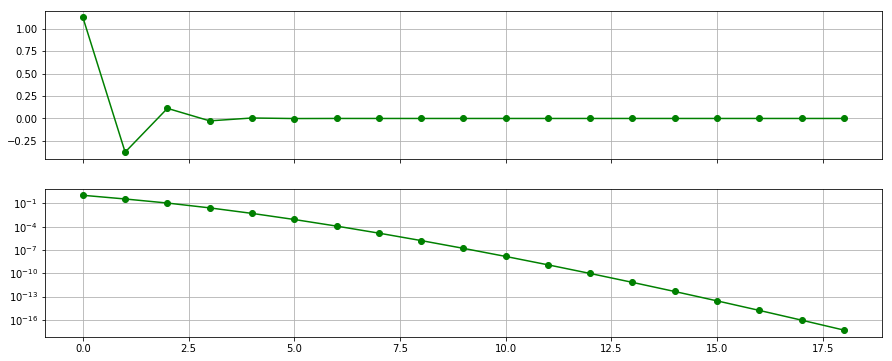

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(15,6), sharex=True )

plt.sca(axes[0])
plt.plot(terms, 'go-')
#plt.yscale('symlog')
plt.grid(True)

plt.sca(axes[1])
plt.plot(np.abs(terms), 'go-')
plt.yscale('log')
plt.grid(True)

In [6]:
x = 1.0
print( special.erf(x))
print( erf_taylor(x, method=erf_taylor0_terms))
print( erf_taylor(x, method=erf_taylor1_terms))

# Taylor series approach is much faster than direct integration,
# but still $50\times slower$ than library function
#
%timeit special.erf(x) 
%timeit erf_taylor(x, method=erf_taylor0_terms)
%timeit erf_taylor(x, method=erf_taylor1_terms)
"""
548 ns ± 5.39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
20.8 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
15.9 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
"""


0.8427007929497148
0.842700792949715
0.842700792949715
866 ns ± 61.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
35 µs ± 3.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
25 µs ± 1.47 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


'\n548 ns ± 5.39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)\n20.8 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)\n15.9 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)\n'

### Complex error function
The error function can be extended for complex arguments

[[ 1.07869312e+09-2.78377703e+09j  5.37156804e+08-3.06197394e+09j
  -7.22779551e+07-3.23364551e+09j ...  7.22779551e+07-3.23364551e+09j
  -5.37156804e+08-3.06197394e+09j -1.07869312e+09-2.78377703e+09j]
 [ 1.25616915e+09-3.05138202e+09j  6.62744649e+08-3.37154856e+09j
  -8.33097300e+06-3.57500373e+09j ...  8.33097300e+06-3.57500373e+09j
  -6.62744649e+08-3.37154856e+09j -1.25616915e+09-3.05138202e+09j]
 [ 1.45876053e+09-3.34372428e+09j  8.08683359e+08-3.71160175e+09j
   6.98945390e+07-3.95165279e+09j ... -6.98945390e+07-3.95165279e+09j
  -8.08683359e+08-3.71160175e+09j -1.45876053e+09-3.34372428e+09j]
 ...
 [ 8.21733112e+13+8.34601294e+13j  1.03476089e+14+6.44889676e+13j
   1.20326034e+14+4.00727715e+13j ... -1.20326034e+14+4.00727715e+13j
  -1.03476089e+14+6.44889676e+13j -8.21733112e+13+8.34601294e+13j]
 [ 9.07211176e+13+9.60412923e+13j  1.15219225e+14+7.50964118e+13j
   1.34800289e+14+4.78908146e+13j ... -1.34800289e+14+4.78908146e+13j
  -1.15219225e+14+7.50964118e+13j -9.07211176e+

C:\Users\Patrick\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


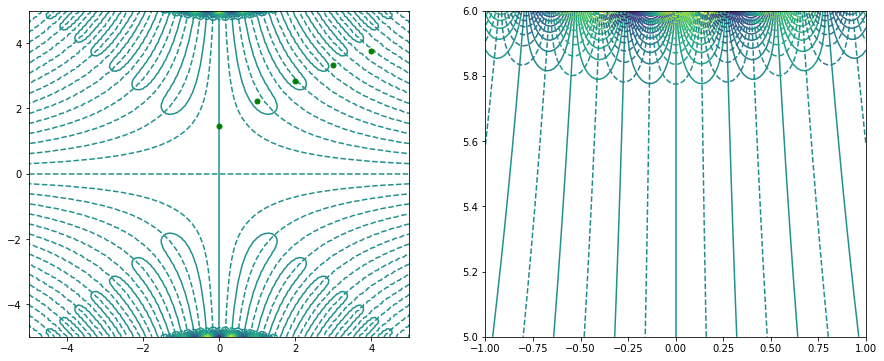

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15,6) )


x = np.linspace(-5, +5, 101)
y = np.linspace(-5, +5, 99)
xx, yy = np.meshgrid(x, y)
gridxy = 1*xx + 1j*yy
z = special.erf(gridxy)

plt.sca( axes[0] )
plt.contour(xx, yy, np.real(z), 30)
plt.contour(xx, yy, np.imag(z), 30, linestyles='dashed' )
plt.plot( special.erf_zeros(5), 'go', ms=5 )


x = np.linspace(-1, +1, 101)
y = np.linspace(+5, +6, 99)
xx, yy = np.meshgrid(x, y)
gridxy = 1*xx + 1j*yy
z = special.erf(gridxy)

print(z)

plt.sca( axes[1] )
plt.contour(xx, yy, np.real(z), 30)
plt.contour(xx, yy, np.imag(z), 30, linestyles='dashed' )
#plt.plot( special.erf_zeros(5), 'go', ms=5 )
#plt.xlim(-1,1)
#plt.ylim(3,5)

In [8]:
x = np.linspace(-5, +5, 101)
y = np.linspace(-5, +5, 99)
xx, yy = np.meshgrid(x, y)
gridxy = 1*xx + 1j*yy
z0 = special.erf(gridxy)
z1 = erf_taylor(gridxy, nterms=9)

ValueError: setting an array element with a sequence.

### Tasks
The special.erf method is vectorized so that we can obtain multiple values for input sequences and grid

#### Write a vectorized function using the Taylor series algorithm. 

#### Compare results to special.erf and determine relative precision of the Taylor series algorithm for $|z| < 9$.

#### Write python code for some more complex algorithm that you find on the web ie.

Efficient Computation of the Complex Error Function
Walter Gautschi
SIAM Journal on Numerical Analysis
Vol. 7, No. 1 (Mar., 1970), pp. 187-198

Computation of the Complex Error Function
J. A. C. Weideman
SIAM Journal on Numerical Analysis
Vol. 31, No. 5 (Oct., 1994), pp. 1497-1518

More efficient computation of the complex error function.
G. P. M. Poppe and C. M. J. Wijers. 1990
ACM Trans. Math. Softw. 16, 1 (March 1990), 38-46. 
DOI: https://doi.org/10.1145/77626.77629


## Conda Virtual Environments
https://conda.io/docs/user-guide/tasks/manage-environments.html

With conda, you can create, export, list, remove and update environments that have different versions of Python and/or packages installed in them. Switching or moving between environments is called activating the environment. You can also share an environment file.

    conda create --name base36 python=3.6
   
    conda info --envs
   
    (base) C:\Users\bjackel>conda info --envs
    
    \# conda environments:
    \#
    base                  *  C:\Users\bjackel\Anaconda3
    base36_17052018          C:\Users\bjackel\Anaconda3\envs\base36_17052018
    base36                   C:\Users\bjackel\Anaconda3\envs\base36
   
    source activate base36
    
Virtual environments may seem like an unecessary layer of complication when you are working with a few simple tasks.  However, they can be extremely helpful for dealing with multiple versions of python or conflicting package requirements.  If we never need them then we will only have wasted a few minutes and some disk space.
    

## Testing and validation

It is possible to use Python standard testing tools, such as doctest or unittest, directly in the notebook.

### Doctest
A notebook cell with a function and a test case in a docstring:

In [ ]:
def add(a, b):
    '''
    This is a test:
    >>> add(2, 2)
    5
    '''
    return a + b

In [ ]:
# A notebook cell (the last one in the notebook) that runs all test cases in the docstrings:

import doctest
doctest.testmod(verbose=True)

In [ ]:
### Unit tests


In [ ]:
def add(a, b):
    return a + b

In [ ]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_add(self):
        self.assertEqual(add(2, 2), 5)


#unittest.main(verbosity=2, exit=False)
unittest.main(argv=[''], verbosity=2, exit=False)   # argv=[''] required for Jupyter notebook


### Heuristic
https://en.wikipedia.org/wiki/Heuristic

A heuristic technique (/hjʊəˈrɪstɪk/; Ancient Greek: εὑρίσκω, "find" or "discover"), often called simply a heuristic, is any approach to problem solving or self-discovery that employs a practical method, not guaranteed to be optimal, perfect, logical, or rational, but instead sufficient for reaching an immediate goal. Where finding an optimal solution is impossible or impractical, heuristic methods can be used to speed up the process of finding a satisfactory solution. Heuristics can be mental shortcuts that ease the cognitive load of making a decision. Examples that employ heuristics include using a rule of thumb, an educated guess, an intuitive judgment, a guesstimate, profiling, or common sense.

In [ ]:
zzero = special.erf_zeros(9)
print( zzero )
print( special.erf(zzero) )
print( special.erf(zzero) - erf_taylor(zzero))